In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
data.shape 

(550068, 10)

#### Observation:
- Data contains 550068 rows 10 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category              550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### Observation

- No missing value / Null values

In [7]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


#### Observation

- Minimum purchase amount is 12 and maximum is 23961
- Average purchase amount is 9263.96 and Mediam purchase amount is 8047
- There are 3 types of city categories
- Age divided into 7 bins
- Number of unique products sold is 3631
- Top selling product is P00265242 and sold 1880 types
- Most of the customers who purchases the products, age between 26 to 35 years
- Most of the products brought by Males , frequency is 414259
- Most of the products sold in City Category B , frequency is 231173

In [8]:
data['Product_Category'].value_counts(ascending=False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

#### Observation

- Most of the selling category is 5, frequency is 150933
- Least selling category is 9, frequency is 410

In [10]:
data['Product_Category'].nunique()

20

#### Observation

- We have data of 20 product categories

In [11]:
data['User_ID'].nunique()

5891

#### Observation:

- Total number of customers are 5891

In [13]:
data['Age'].value_counts(ascending=False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

#### Observation

- Based on customer age divding into bins.
    1. 0-17
    2. 18-25
    3. 26-35
    4. 36-45
    5. 46-50
    6. 51-55
    7. 55+
- Most of the products purchased by customers whose age in between 26-35

In [14]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

#### Observation

- As per given sample data, Most of the products brought by males (75.3%)

In [17]:
data['City_Category'].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

#### Observation

- Most of the products sold in city category is B (42.02%) and least one is A (26.85%)

In [18]:
data['Marital_Status'].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

#### Observation

- Most of the products brought by Single (59.03%) and least one is Married (40.96%)

In [20]:
data['Product_Category'].value_counts(normalize=True)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

#### Observation

- Most of the selling category is 5 (27.43%) and least one is 9 (0.07%)

In [22]:
data['Occupation'].value_counts(normalize=True)*100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

#### Observation

- Most of the products brought by customers who's occupation is 4.

In [24]:
data.groupby('Gender')["Purchase"].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

#### Observation

- Most of the amount spent by Male (Amount is 3909580100)

In [26]:
data.groupby('Age')["Purchase"].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

#### Observation

- Most of the amount spent by the customers who's age is between 26-35 (Amount is 2031770578)

In [28]:
data.groupby('Occupation')["Purchase"].sum()

Occupation
0     635406958
1     424614144
2     238028583
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
20    296570442
Name: Purchase, dtype: int64

#### Observation

- Most of the amount spent by customers who's Occupation is 4 (Amount is 666244484)

In [29]:
data.groupby('City_Category')["Purchase"].sum()

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

#### Observation

- Most of the purchases happend in city category B (Amount is 2115533605)

In [30]:
data.groupby('Marital_Status')["Purchase"].sum()

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64

#### Observation

- Most of the amount spent by customers whos Marital_Status is 0 (Amount is 3008927447)

In [33]:
data.groupby('Product_Category')["Purchase"].sum()

Product_Category
1     1910013754
2      268516186
3      204084713
4       27380488
5      941835229
6      324150302
7       60896731
8      854318799
9        6370324
10     100837301
11     113791115
12       5331844
13       4008601
14      20014696
15      92969042
16     145120612
17       5878699
18       9290201
19         59378
20        944727
Name: Purchase, dtype: int64

#### Observation

- Most sales happend on product category 1 in terms of amount. (Amount is 1910013754)

In [35]:
data.groupby('User_ID')["Purchase"].sum().sort_values(ascending=False)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
             ...   
1004991       52371
1005117       49668
1003883       49349
1000094       49288
1004464       46681
Name: Purchase, Length: 5891, dtype: int64

#### Observation

- The user with id 1004277 spent more money (Amount is 10536909) to purchase products

- The user with id 1004464 spent less money (Amount is 46681) to purchase products

### Data Visualization

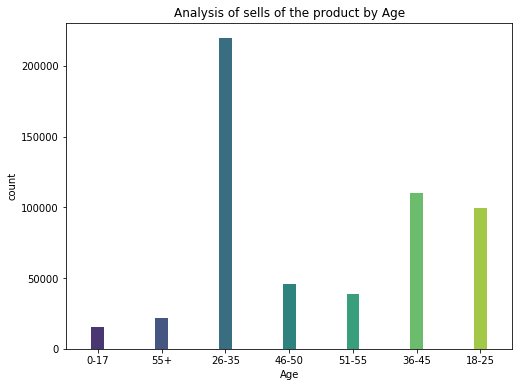

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="Age",
palette="viridis", width=0.2)
plt.xticks(fontsize=10)
plt.title("Analysis of sells of the product by Age")
plt.show()

#### Observation

- Most of the products brought by customers who's age between 26-35 and least one is 0-17

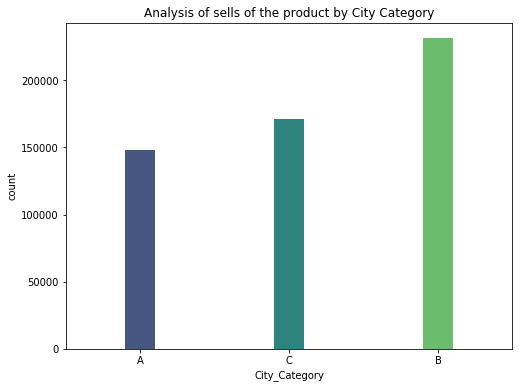

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="City_Category",
palette="viridis", width=0.2)
plt.xticks(fontsize=10)
plt.title("Analysis of sells of the product by City Category")
plt.show()

#### Observation:

- Most of the products sold in City Category B and least one is A

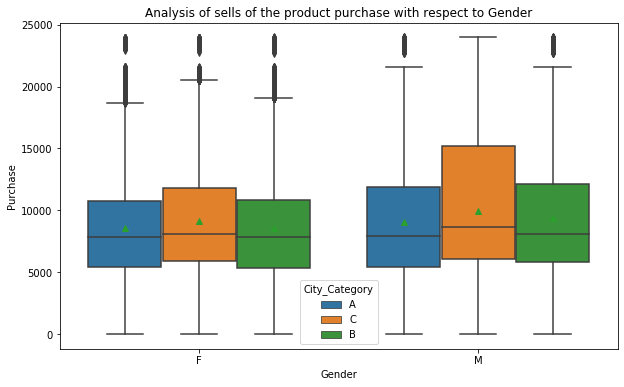

In [41]:
#bivariance analysis
plt.figure(figsize=(10,6))
plt.title("Analysis of sells of the product purchase with respect to Gender")
sns.boxplot(x='Gender', y='Purchase', hue='City_Category', data=data, showmeans=True)
plt.show()

#### Observations

- Most of the products purchases by Males and females in city category C

#### Correlation

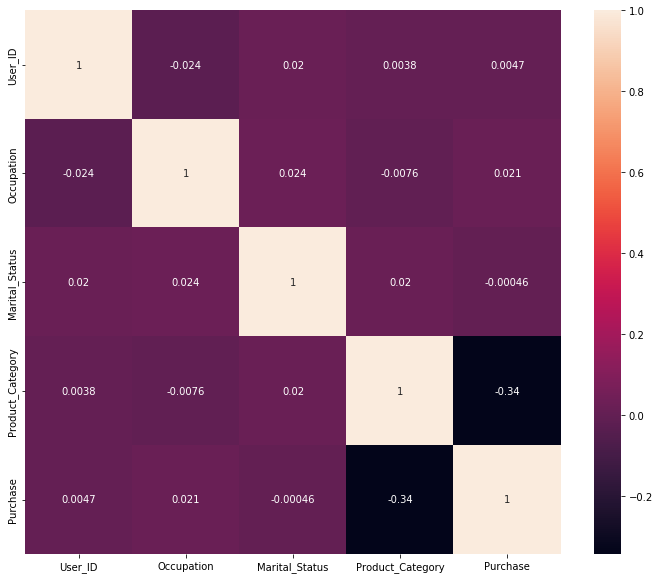

In [54]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(data.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


#### Observation

- Purchase and Occupation , Marital Status and Occupations are positively correleted Compare to others

- Marital status and Purchase, Occupation and Product category are negatively correlated

In [56]:
df_men = data.loc[data['Gender']=='M']
df_men

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [57]:
df_men['Purchase'].mean()

9437.526040472265

In [58]:
df_men['Purchase'].std()

5092.186209777949

In [59]:
df_women = data.loc[data['Gender']=='F']
df_women

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [60]:
df_women['Purchase'].mean()

8734.565765155476

In [61]:
df_women['Purchase'].std()

4767.233289291444

### Here for sampling the data, we used bootstraping - Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a population parameter.

## Men Purchase pattern analysis

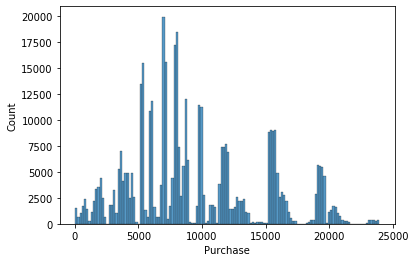

In [62]:
sns.histplot(df_men['Purchase'])
plt.show()

In [63]:
n = 100000 # Sample size of 100000

In [64]:
bootstrapped_means_men = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_men['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_men.append(bootstrapped_mean)

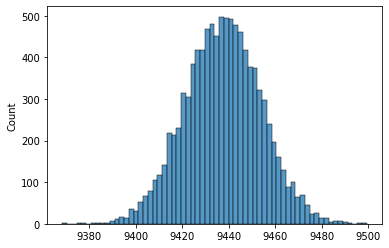

In [65]:
sns.histplot(bootstrapped_means_men)
plt.show()

In [66]:
np.array(bootstrapped_means_men).mean()

9437.45173865

In [67]:
x1 = np.percentile(bootstrapped_means_men, 2.5) # Lower limit for 95% confidence
x1

9405.45827575

In [68]:
x2 = np.percentile(bootstrapped_means_men, 97.5) # Upper limit for 95% confidence
x2

9469.562542999998

In [69]:
x1 = np.percentile(bootstrapped_means_men, 5) # Lower limit for 90% confidence
x1

9410.7975825

In [70]:
x2 = np.percentile(bootstrapped_means_men, 95) # Upper limit for 90% confidence
x2

9464.059517

#### Observation

- For sample size 100000, Sample mean of mean purchase is 9437.45. As per central limit theorem sample mean is very nearer to population mean.

- For 90% of the confidence(10% of significance) Confidence interval is (9410.79, 9464.05)

- For 95% of the confidence(5% of significance) Confidence interval is (9405.45, 9469.56)

In [71]:
n = 200000 # Sample size of 200000

In [73]:
bootstrapped_means_men = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_men['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_men.append(bootstrapped_mean)

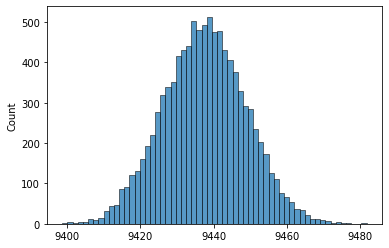

In [74]:
sns.histplot(bootstrapped_means_men)
plt.show()

In [75]:
np.array(bootstrapped_means_men).mean()

9437.450529115

In [76]:
x1 = np.percentile(bootstrapped_means_men, 2.5) # Lower limit for 95% confidence
x1

9415.34725275

In [77]:
x2 = np.percentile(bootstrapped_means_men, 97.5) # Upper limit for 95% confidence
x2

9459.516682625

In [78]:
x1 = np.percentile(bootstrapped_means_men, 5) # Lower limit for 90% confidence
x1

9418.695248

In [79]:
x2 = np.percentile(bootstrapped_means_men, 95) # Upper limit for 90% confidence
x2

9455.98538575

#### Observation

- For sample size 200000, Sample mean of mean purchase is 9437.45. As per central limit theorem sample mean is very nearer to population mean.

- For 90% of the confidence(10% of significance) Confidence interval is (9418.69, 9455.98)

- For 95% of the confidence(5% of significance) Confidence interval is (9415.34, 9460.51)

In [80]:
n = len(df_men) # Sample size is 414259
n

414259

In [81]:
bootstrapped_means_men = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_men['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_men.append(bootstrapped_mean)

In [82]:
len(bootstrapped_means_men)

10000

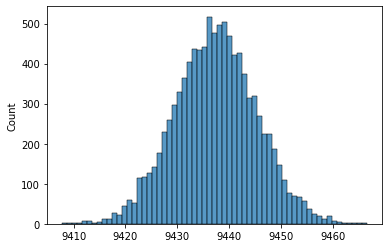

In [83]:
sns.histplot(bootstrapped_means_men)
plt.show()

In [84]:
np.array(bootstrapped_means_men).mean()

9437.441061481828

In [85]:
x1 = np.percentile(bootstrapped_means_men, 2.5) # Lower limit for 95% confidence
x1

9422.250231437338

In [86]:
x2 = np.percentile(bootstrapped_means_men, 97.5) # Upper limit for 95% confidence
x2

9453.150440304255

In [87]:
x1 = np.percentile(bootstrapped_means_men, 5) # Lower limit for 90% confidence
x1

9424.331084780293

In [88]:
x2 = np.percentile(bootstrapped_means_men, 95) # Upper limit for 90% confidence
x2

9450.29601626036

#### Observation

- As sample size increase, data distribution range is decrease (we can observe in hist plots). So will get occurate result.

- For sample size 414259, Sample mean of mean purchase is 9437.44. As per central limit theorem sample mean is very nearer to population mean.

- For 90% of the confidence(10% of significance) Confidence interval is (9424.33, 9450.29)

- For 95% of the confidence(5% of significance) Confidence interval is (9422.25, 9453.15)

## Women Purchase pattern analysis

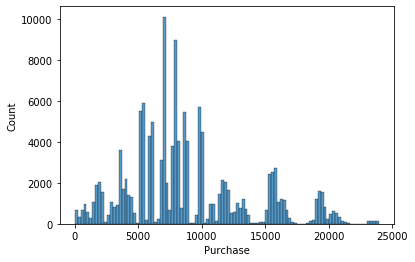

In [90]:
sns.histplot(df_women['Purchase'])
plt.show()

In [91]:
n = 100000 # Sample size of 100000

In [92]:
bootstrapped_means_women = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_women['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_women.append(bootstrapped_mean)

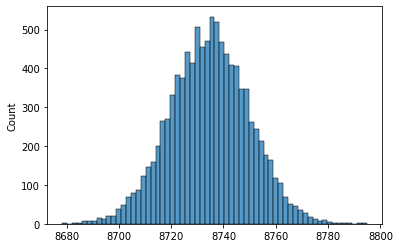

In [93]:
sns.histplot(bootstrapped_means_women)
plt.show()

In [94]:
np.array(bootstrapped_means_women).mean()

8734.655302771

In [95]:
x1 = np.percentile(bootstrapped_means_women, 2.5) # Lower limit for 95% confidence
x1

8704.69907925

In [96]:
x2 = np.percentile(bootstrapped_means_women, 97.5) # Upper limit for 95% confidence
x2

8763.774958499998

In [97]:
x1 = np.percentile(bootstrapped_means_women, 5) # Lower limit for 90% confidence
x1

8709.779520999999

In [98]:
x2 = np.percentile(bootstrapped_means_women, 95) # Upper limit for 90% confidence
x2

8759.268281

#### Observation

- For sample size 100000, Sample mean of mean purchase is 8734.65. As per central limit theorem sample mean is very nearer to population mean.
- For 90% of the confidence(10% of significance) Confidence interval is (8709.77, 8759.26)
- For 95% of the confidence(5% of significance) Confidence interval is (8704.69, 8763.77)

In [99]:
n = len(df_women)
n

135809

In [100]:
bootstrapped_means_women = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_women['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_women.append(bootstrapped_mean)

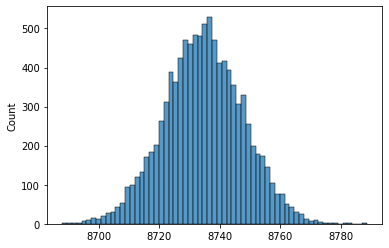

In [101]:
sns.histplot(bootstrapped_means_women)
plt.show()

In [102]:
np.array(bootstrapped_means_women).mean()

8734.691519897799

In [103]:
x1 = np.percentile(bootstrapped_means_women, 2.5) # Lower limit for 95% confidence
x1

8709.129007282287

In [104]:
x2 = np.percentile(bootstrapped_means_women, 97.5) # Upper limit for 95% confidence
x2

8760.183823237045

In [105]:
x1 = np.percentile(bootstrapped_means_women, 5) # Lower limit for 90% confidence
x1

8713.075243908725

In [106]:
x2 = np.percentile(bootstrapped_means_women, 95) # Upper limit for 90% confidence
x2

8756.149653925733

#### Observation

- As sample size increase, data distribution range is decrease (we can observe in hist plots). So will get occurate result.

- For sample size 135809, Sample mean of mean purchase is 8734.69. As per central limit theorem sample mean is very nearer to population mean.

- For 90% of the confidence(10% of significance) Confidence interval is (8713.07, 8756.14)

- For 95% of the confidence(5% of significance) Confidence interval is (8709.12, 8760.18)

### Analysis on men and women purchase pattern

- By considering the maximum sample size and 95% confidence interval for both men and women analysis

- For Women, for sample size 135809, Sample mean of mean purchase is 8734.69. As per central limit theorem sample mean is very nearer to population mean.

- For 95% of the confidence(5% of significance) Confidence interval is (8709.12, 8760.18)

- For sample size 414259, Sample mean of mean purchase is 9437.44. As per central limit theorem sample mean is very nearer to population mean.

- For 95% of the confidence(5% of significance) Confidence interval is (9422.25, 9453.15)

- Men and Women - 95% Confidence Interval is not over lapping. So their population mean purchase is different

## Married vs Not Married customer data analysis

In [107]:
df_married = data.loc[data['Marital_Status']==1]
df_married

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


In [108]:
df_married.shape

(225337, 10)

In [109]:
df_married['Purchase'].mean()

9261.174574082374

In [110]:
df_married['Purchase'].std()

5016.89737779313

In [111]:
df_notmarried = data.loc[data['Marital_Status']==0]
df_notmarried

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,254
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


In [112]:
df_notmarried.shape

(324731, 10)

In [113]:
df_notmarried['Purchase'].mean()

9265.907618921507

In [114]:
df_notmarried['Purchase'].std()

5027.347858674457

### Married customer data analysis

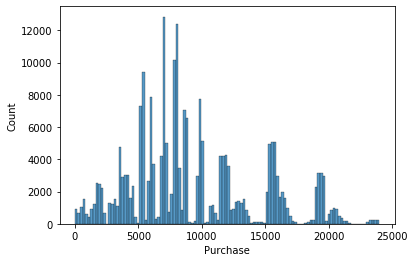

In [115]:
sns.histplot(df_married['Purchase'])
plt.show()

In [116]:
n = 100000 # Sample size of 100000

In [117]:
bootstrapped_means_married = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_married['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_married.append(bootstrapped_mean)

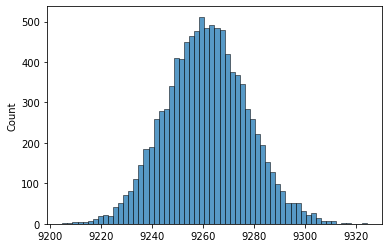

In [118]:
sns.histplot(bootstrapped_means_married)
plt.show()

In [119]:
np.array(bootstrapped_means_married).mean()

9261.191764868001

In [120]:
x1 = np.percentile(bootstrapped_means_married, 2.5) # Lower limit for 95% confidence
x1

9230.378129749999

In [121]:
x2 = np.percentile(bootstrapped_means_married, 97.5) # Upper limit for 95% confidence
x2

9293.15643225

#### Observation

- For sample size 100000, Sample mean of mean purchase is 9261.19. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9230.37, 9293.15)

In [123]:
n = len(df_married) # Sample size of 225337
n

225337

In [124]:
bootstrapped_means_married = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_married['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_married.append(bootstrapped_mean)

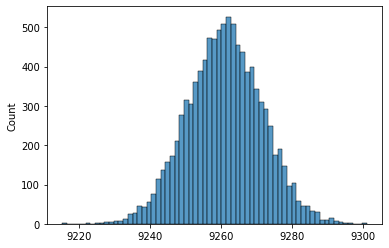

In [125]:
sns.histplot(bootstrapped_means_married)
plt.show()

In [126]:
np.array(bootstrapped_means_married).mean()

9261.138817735657

In [127]:
x1 = np.percentile(bootstrapped_means_married, 2.5) # Lower limit for 95% confidence
x1

9240.707066194189

In [128]:
x2 = np.percentile(bootstrapped_means_married, 97.5) # Upper limit for 95% confidence
x2

9281.550301326459

### Observation

- As sample size increase, data distribution range is decrease (we can observe in hist plots). So will get occurate result.
- For sample size 225337, Sample mean of mean purchase is 9261.13. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9240.70, 9281.55)

### Unmarried customer data analysis

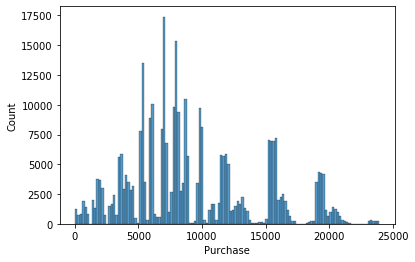

In [129]:
sns.histplot(df_notmarried['Purchase'])
plt.show()

In [130]:
n = 150000 # Sample size of 150000

In [131]:
bootstrapped_means_notmarried = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_notmarried['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_notmarried.append(bootstrapped_mean)

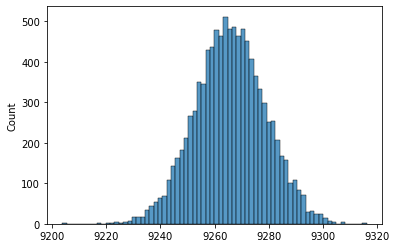

In [132]:
sns.histplot(bootstrapped_means_notmarried)
plt.show()

In [133]:
np.array(bootstrapped_means_notmarried).mean()

9265.876272032001

In [134]:
x1 = np.percentile(bootstrapped_means_notmarried, 2.5) # Lower limit for 95% confidence
x1

9240.316296833333

In [135]:
x2 = np.percentile(bootstrapped_means_notmarried, 97.5) # Upper limit for 95% confidence
x2

9291.377454833333

#### Observation

- For sample size 150000, Sample mean of mean purchase is 9265.87. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9240.31, 9291.37)

In [137]:
n = len(df_notmarried['Purchase']) # Sample size of 324731

In [138]:
bootstrapped_means_notmarried = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_notmarried['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_notmarried.append(bootstrapped_mean)

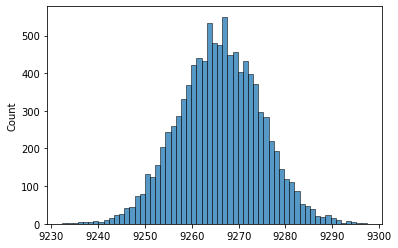

In [139]:
sns.histplot(bootstrapped_means_notmarried)
plt.show()

In [140]:
np.array(bootstrapped_means_notmarried).mean()

9265.874752663281

In [141]:
x1 = np.percentile(bootstrapped_means_notmarried, 2.5) # Lower limit for 95% confidence
x1

9248.586977914028

In [142]:
x2 = np.percentile(bootstrapped_means_notmarried, 97.5) # Upper limit for 95% confidence
x2

9282.985523556421

#### Observation

- As sample size increase, data distribution range is decrease (we can observe in hist plots). So will get occurate result.
- For sample size 324731, Sample mean of mean purchase is 9265.87. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9248.58, 9282.98)

### Analysis on Married and Unmarried customer purchase pattern


- By considering the maximum sample size and 95% confidence interval for both married and unmarried customer data analysis

- For Married , 225337, Sample mean of mean purchase is 9261.13.

- For 95% of the confidence(5% of significance) Confidence interval is (9240.70, 9281.55)

- For Unmarried, 324731, Sample mean of mean purchase is 9265.87

- For 95% of the confidence(5% of significance) Confidence interval is (9248.58, 9282.98)

- Men and Women - 95% Confidence Interval is over lapping. So their population mean purchase may not be different

## Customer purchase data analysis based on Age

In [143]:
df_c1 = data.loc[data['Age']=='0-17']
len(df_c1)

15102

In [144]:
df_c2 = data.loc[data['Age']=='18-25']
len(df_c2)

99660

In [145]:
df_c3 = data.loc[data['Age']=='26-35']
len(df_c3)

219587

In [146]:
df_c4 = data.loc[data['Age']=='36-45']
len(df_c4)

110013

In [147]:
df_c5 = data.loc[data['Age']=='46-50']
len(df_c5)

45701

In [148]:
df_c6 = data.loc[data['Age']=='51-55']
len(df_c6)

38501

In [149]:
df_c7 = data.loc[data['Age']=='55+']
len(df_c7)

21504

### Analysis of customer purchase data who's data between 0-17

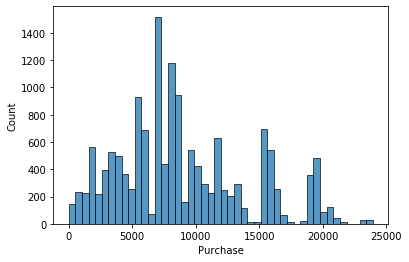

In [150]:
sns.histplot(df_c1['Purchase'])
plt.show()

In [151]:
n = len(df_c1) # Sample size of 15102
n

15102

In [152]:
bootstrapped_means_c1= []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_c1['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_c1.append(bootstrapped_mean)

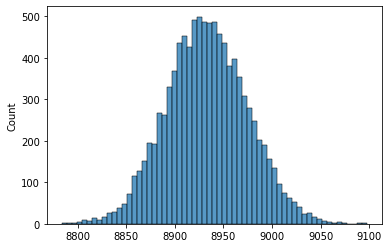

In [153]:
sns.histplot(bootstrapped_means_c1)
plt.show()

In [154]:
np.array(bootstrapped_means_c1).mean()

8933.115089272944

In [155]:
x1 = np.percentile(bootstrapped_means_c1, 2.5) # Lower limit for 95% confidence
x1

8854.148852800954

In [156]:
x2 = np.percentile(bootstrapped_means_c1, 97.5) # Upper limit for 95% confidence
x2

9015.626051185272

#### Observation

- For sample size 15102, Sample mean of mean purchase is 8933.11. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (8854.14, 9015.62)

### Analysis of customer purchase data who's data between 18-25

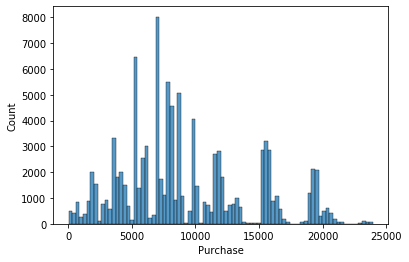

In [157]:
sns.histplot(df_c2['Purchase'])
plt.show()

In [158]:
n = len(df_c2) # Sample size of 99660
n

99660

In [159]:
bootstrapped_means_c2= []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_c2['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_c2.append(bootstrapped_mean)

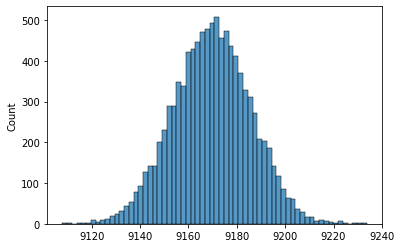

In [160]:
sns.histplot(bootstrapped_means_c2)
plt.show()

In [161]:
np.array(bootstrapped_means_c2).mean()

9169.711754742124

In [162]:
x1 = np.percentile(bootstrapped_means_c2, 2.5) # Lower limit for 95% confidence
x1

9138.153218944411

In [163]:
x2 = np.percentile(bootstrapped_means_c2, 97.5) # Upper limit for 95% confidence
x2

9200.84448700582

#### Observation

- For sample size 99660, Sample mean of mean purchase is 9169.71. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9138.15, 9200.84)

### Analysis of customer purchase data who's data between 26-35

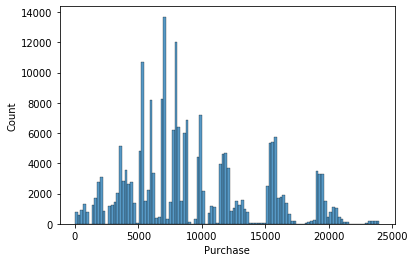

In [166]:
sns.histplot(df_c3['Purchase'])
plt.show()

In [167]:
n = len(df_c3) # Sample size of 219587
n

219587

In [168]:
bootstrapped_means_c3= []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_c3['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_c3.append(bootstrapped_mean)

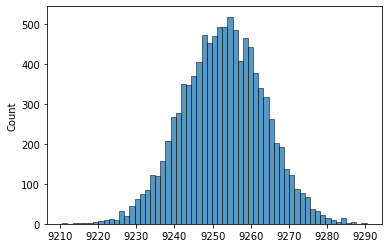

In [169]:
sns.histplot(bootstrapped_means_c3)
plt.show()

In [170]:
np.array(bootstrapped_means_c3).mean()

9252.732821279493

In [171]:
x1 = np.percentile(bootstrapped_means_c3, 2.5) # Lower limit for 95% confidence
x1

9231.780803166854

In [172]:
x2 = np.percentile(bootstrapped_means_c3, 97.5) # Upper limit for 95% confidence
x2

9273.273847267825

#### Observation

- For sample size 219587, Sample mean of mean purchase is 9252.73. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9231.78, 9273.27)

### Analysis of customer purchase data who's data between 36-45

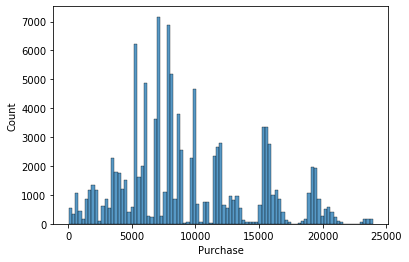

In [174]:
sns.histplot(df_c4['Purchase'])
plt.show()

In [175]:
n = len(df_c4) # Sample size of 110013
n

110013

In [176]:
bootstrapped_means_c4= []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_c4['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_c4.append(bootstrapped_mean)

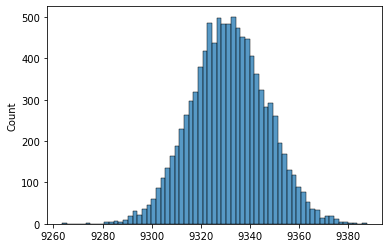

In [177]:
sns.histplot(bootstrapped_means_c4)
plt.show()

In [178]:
np.array(bootstrapped_means_c4).mean()

9331.50536055466

In [179]:
x1 = np.percentile(bootstrapped_means_c4, 2.5) # Lower limit for 95% confidence
x1

9302.050904665812

In [180]:
x2 = np.percentile(bootstrapped_means_c4, 97.5) # Upper limit for 95% confidence
x2

9361.465670648015

#### Observation

- For sample size 110013, Sample mean of mean purchase is 9331.50. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9302.05, 9361.46)

### Analysis of customer purchase data who's data between 46-50

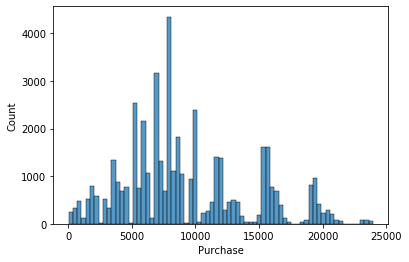

In [181]:
sns.histplot(df_c5['Purchase'])
plt.show()

In [182]:
n = len(df_c5) # Sample size of 45701
n

45701

In [183]:
bootstrapped_means_c5= []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_c5['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_c5.append(bootstrapped_mean)

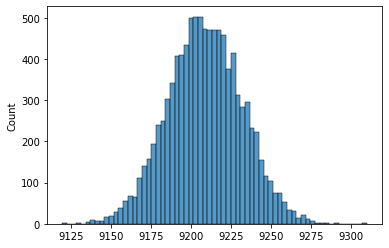

In [184]:
sns.histplot(bootstrapped_means_c5)
plt.show()

In [185]:
np.array(bootstrapped_means_c5).mean()

9208.573164617843

In [186]:
x1 = np.percentile(bootstrapped_means_c5, 2.5) # Lower limit for 95% confidence
x1

9163.14506356535

In [187]:
x2 = np.percentile(bootstrapped_means_c5, 97.5) # Upper limit for 95% confidence
x2

9254.256866370539

#### Observation

- For sample size 45701, Sample mean of mean purchase is 9208.57. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9163.14, 9254.25)

### Analysis of customer purchase data who's data between 51-55

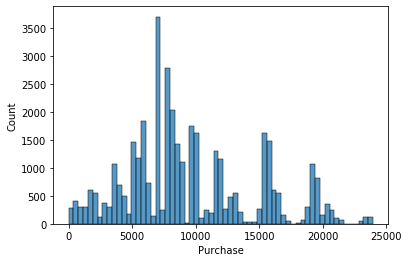

In [188]:
sns.histplot(df_c6['Purchase'])
plt.show()

In [189]:
n = len(df_c6) # Sample size of 38501
n

38501

In [190]:
bootstrapped_means_c6= []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_c6['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_c6.append(bootstrapped_mean)

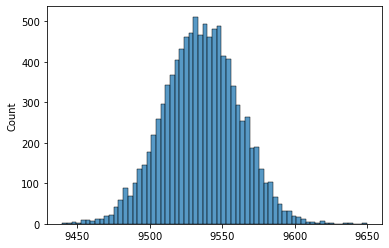

In [191]:
sns.histplot(bootstrapped_means_c6)
plt.show()

In [192]:
np.array(bootstrapped_means_c6).mean()

9535.465361813978

In [193]:
x1 = np.percentile(bootstrapped_means_c6, 2.5) # Lower limit for 95% confidence
x1

9483.587918495623

In [194]:
x2 = np.percentile(bootstrapped_means_c6, 97.5) # Upper limit for 95% confidence
x2

9585.11564699618

#### Observation

- For sample size 38501, Sample mean of mean purchase is 9534.46. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9483.58, 9585.11)

### Analysis of customer purchase data who's data between 55+

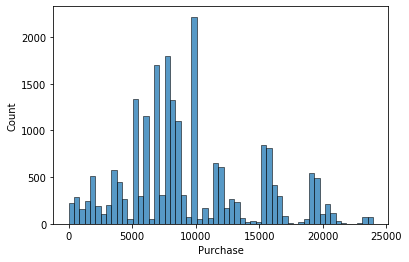

In [195]:
sns.histplot(df_c7['Purchase'])
plt.show()

In [196]:
n = len(df_c7) # Sample size of 21504
n

21504

In [197]:
bootstrapped_means_c7= []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(df_c7['Purchase'], size = n )
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_c7.append(bootstrapped_mean)

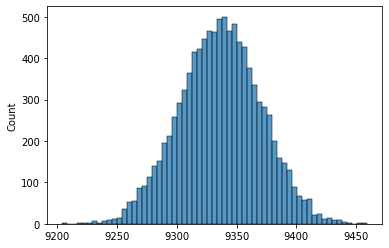

In [198]:
sns.histplot(bootstrapped_means_c7)
plt.show()

In [199]:
np.array(bootstrapped_means_c7).mean()

9336.396615569196

In [200]:
x1 = np.percentile(bootstrapped_means_c7, 2.5) # Lower limit for 95% confidence
x1

9268.95081263951

In [201]:
x2 = np.percentile(bootstrapped_means_c7, 97.5) # Upper limit for 95% confidence
x2

9402.638459123884

#### Observation

- For sample size 21504, Sample mean of mean purchase is 9336.39. As per central limit theorem sample mean is very nearer to population mean.
- For 95% of the confidence(5% of significance) Confidence interval is (9268.95, 9402.63)

#### Final Observation on All Age groups

Here is the summary (95% Confidence interval - CI )

- Category 1 : Age between 0-17, Mean 8933.42 and CI  (8854.14, 9015.62)
- Category 2 : Age between 18-25 , Mean 9169.53 and CI (9138.15, 9200.84)
- Category 3: Age between 26-35, Mean 9252.65 and CI (9231.78, 9273.27)
- Category 4: Age between 36-45, Mean 9331.45 and CI (9302.05, 9361.46)
- Category 5: Age between 46-50, Mean 9208.76 and CI (9163.14, 9254.25)
- Category 6: Age between 51-55, Mean 9534.64 and CI  (9483.58, 9585.11)
- Category 7: Age 55+, Mean 9335.63 and CI (9268.95, 9402.63)

- Category 1,Category 2,Category 3,Category 4 and Category 6 confidence interval not overlapping, then their population mean purchase is different.
- Category 5 and Category 7 Confidence interval is overlapping with other categories. their population mean purchase may not be the different than other categories

### Recommendations and Action items to retail corporation

- As per data, Most of the products sold from Category B cities, so it has to maintain the inventory accordingly

- Most of the Most of the selling product category is 5, so it has to keep track of the inventory on regular basis

- Least Selling product Category is 9, So it may focus on that category to increase sales in that category by offering some special discounts

- Most of the products purchased by customers whose age in between 26-35. So it may concentrate these age people to attract the more to get more sale by special offers on product categories most brought by these age group customers

- Most of the products brought by customers who's occupation is 4 and Most of the amount spent by Male (Amount is 3909580100), so it can send customised recommendation to males who’s occupation is 4

- The user with id 1004277 spent more money (Amount is 10536909) to purchase products. We can divide the customers into bin based on Amount spent, accordingly we can send recommendations to them

#### Analysis on men and women purchase pattern

- By considering the maximum sample size and 95% confidence interval for both men and women analysis

- For Women, for sample size 135809, Sample mean of mean purchase is  8734.69. As per central limit theorem sample mean is very nearer to population mean.

- For 95% of the confidence(5% of significance) Confidence interval is (8709.12, 8760.18)

- For Men, for sample size 414259, Sample mean of mean purchase is 9437.44. As per central limit theorem sample mean is very nearer to population mean.

- For 95% of the confidence(5% of significance) Confidence interval is (9422.25, 9453.15)

- Men and Women - 95% Confidence Interval is not over lapping. So their population mean purchase is different

- So we can distinguish men and women purchase per transaction. Men purchase per transaction lie between (9421.43, 9452.90) and women lies between (9421.43, 9452.90)

- So as per data men purchase is more compare to women, We can send customised recommandations to men by observing their most buying categories, and also it can give special offers to women to increase their sales

#### Analysis on Married and Unmarried customer purchase pattern

- By considering the maximum sample size and 95% confidence interval for both married and unmarried customer data analysis
- For Married , 225337, Sample mean of mean purchase is 9261.13.
- For 95% of the confidence(5% of significance) Confidence interval is (9240.70, 9281.55)
- For Unmarried, 324731, Sample mean of mean purchase is 9265.87
- For 95% of the confidence(5% of significance) Confidence interval is (9248.58, 9282.98)
- Men and Women - 95% Confidence Interval is over lapping. So their population mean purchase may not be different
- The difference in effect estimates between the Married and Unmarried Customers is judged to be statistically insignificant

#### Analysis on All Age groups

Here is the summary (95% Confidence interval - CI )
- Category 1 : Age between 0-17, Mean 8933.42 and CI  (8854.14, 9015.62)
- Category 2 : Age between 18-25 , Mean 9169.53 and CI (9138.15, 9200.84)
- Category 3: Age between 26-35, Mean 9252.65 and CI (9231.78, 9273.27)
- Category 4: Age between 36-45, Mean 9331.45 and CI (9302.05, 9361.46)
- Category 5: Age between 46-50, Mean 9208.76 and CI (9163.14, 9254.25)
- Category 6: Age between 51-55, Mean 9534.64 and CI  (9483.58, 9585.11)
- Category 7: Age 55+, Mean 9335.63 and CI (9268.95, 9402.63)

- Category 1,Category 2,Category 3,Category 4 and Category 6 confidence interval not overlapping, then their population mean purchase is different. So it can send customised recommendations / offers to particular category of people by observing their most buying products/ products categories.
- Category 5 and Category 7 Confidence interval is overlapping with other categories. their population mean purchase may not be the different than other categories. So the difference in effect estimates between these age group Customers is judged to be statistically insignificant